In [144]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress

mortgage_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/MORTGAGE30US.csv"

In [2]:
mortgage_df = pd.read_csv(mortgage_data_path)

In [3]:
mortgage_df.dtypes

DATE             object
MORTGAGE30US    float64
dtype: object

In [52]:
mortgage_df["DATE"] = pd.to_datetime(mortgage_df["DATE"])

In [54]:
mortgage_df["YEAR"] = mortgage_df["DATE"].dt.year

In [57]:
average_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].mean().reset_index()
median_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].median().reset_index()

average_mortgage_by_year.rename(columns={"MORTGAGE30US": "Average Mortgage"}, inplace=True)
median_mortgage_by_year.rename(columns={'MORTGAGE30US': 'Median Mortgage'}, inplace=True)

average_mortgage_by_year.rename(columns={"YEAR": "Year"}, inplace=True)
median_mortgage_by_year.rename(columns={'YEAR': 'Year'}, inplace=True)

average_mortgage_by_year.head()

,Year,Average Mortgage
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115


In [60]:
education_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Years of School Completed by People 25 Years and Over.csv"

education_df = pd.read_csv(education_data_path)

education_df.dtypes

Year                           int64
Total                         object
0 to 4 years (Elementary)     object
5 to 8 years (Elementary)     object
1 to 3 years (High School)    object
4 years (High School)         object
1 to 3 years (College)        object
4 years or more (College)     object
dtype: object

In [62]:
for column in education_df.columns:
    education_df[column] = education_df[column].astype(str).str.replace(",", "").astype(float)

education_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,2203.0,5732.0,11998.0,64465.0,56659.0,85217.0
1,2021.0,224580.0,2074.0,5862.0,12118.0,62547.0,56942.0,85037.0
2,2020.0,223058.0,2106.0,5788.0,12313.0,61597.0,57552.0,83701.0
3,2019.0,221478.0,2181.0,6422.0,13372.0,62259.0,57428.0,79816.0
4,2018.0,219830.0,2129.0,6600.0,13682.0,62685.0,57810.0,76924.0


In [64]:
education_percentage_df = education_df.copy()

In [66]:
for column in education_percentage_df.columns[2:]:
    education_percentage_df[column] = education_percentage_df[column] / education_percentage_df["Total"] * 100

education_percentage_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,0.973598,2.533212,5.302421,28.489796,25.039996,37.660977
1,2021.0,224580.0,0.923502,2.610206,5.395850,27.850655,25.354885,37.864903
2,2020.0,223058.0,0.944149,2.594841,5.520089,27.614791,25.801361,37.524321
3,2019.0,221478.0,0.984748,2.899611,6.037620,28.110693,25.929438,36.037891
4,2018.0,219830.0,0.968476,3.002320,6.223900,28.515216,26.297594,34.992494


In [68]:
homes_data = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Number_Houses_Sold.csv"

In [70]:
homes_df = pd.read_csv(homes_data)
homes_df.dtypes

Year           float64
Total (USA)     object
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

In [72]:
homes_df.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560,87.0,134.0,199.0,141.0
1,1964.0,565,90.0,146.0,200.0,129.0
2,1965.0,575,94.0,142.0,210.0,129.0
3,1966.0,461,84.0,113.0,166.0,99.0
4,1967.0,487,77.0,112.0,179.0,119.0


In [98]:
for column in homes_df.columns:
    homes_df[column] = homes_df[column].astype(str).str.replace(",", "").astype(float)
homes_df.dtypes

Year           float64
Total (USA)    float64
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

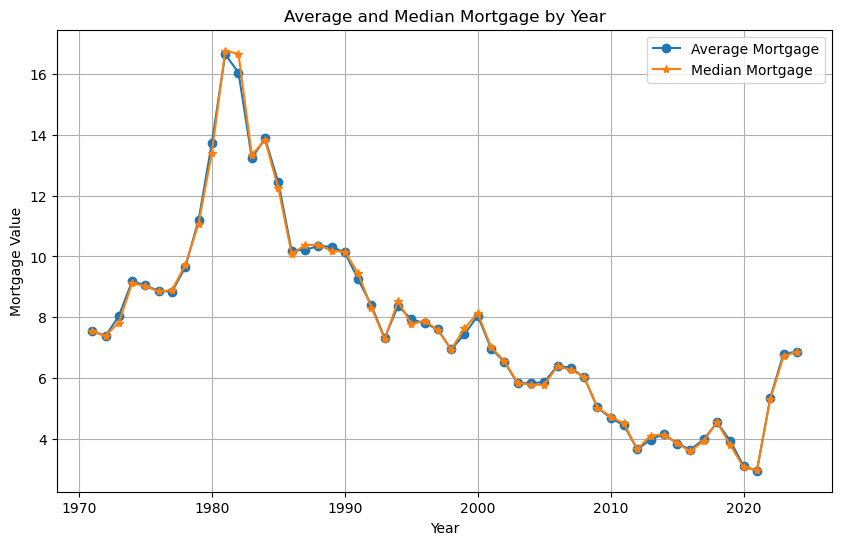

In [100]:
med_avg_merged = pd.merge(average_mortgage_by_year, median_mortgage_by_year, on='Year')

plt.figure(figsize=(10, 6))
plt.plot(med_avg_merged['Year'], med_avg_merged['Average Mortgage'], marker='o', label='Average Mortgage')
plt.plot(med_avg_merged['Year'], med_avg_merged['Median Mortgage'], marker='*', label='Median Mortgage')
plt.xlabel('Year')
plt.ylabel('Mortgage Value')
plt.title('Average and Median Mortgage by Year')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
homes_mortgage_merge = pd.merge(average_mortgage_by_year, homes_df, on="Year")

corr_mort_homes = homes_mortgage_merge[["Average Mortgage", "Total (USA)"]].corr()

In [104]:
corr_mort_homes

,Average Mortgage,Total (USA)
Average Mortgage,1.000000,-0.094944
Total (USA),-0.094944,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


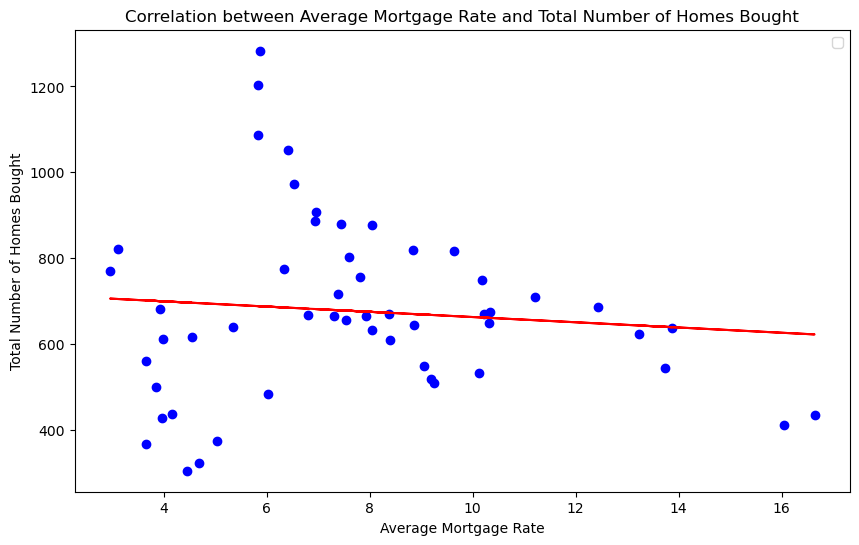

In [154]:
x = homes_mortgage_merge["Average Mortgage"]
y = homes_mortgage_merge["Total (USA)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, slope * x + intercept, color = "red")
plt.title("Correlation between Average Mortgage Rate and Total Number of Homes Bought")
plt.xlabel("Average Mortgage Rate")
plt.ylabel("Total Number of Homes Bought")
plt.legend()

# Show the plot
plt.show()

In [169]:
education_homes_df = pd.merge(education_df, homes_df, on='Year')

def perform_regression(x, y, label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f"{label} R-squared: {r_value**2}")

perform_regression(education_homes_df['0 to 4 years (Elementary)'], education_homes_df['Total (USA)'], "Elementary (0 to 4 years)")
perform_regression(education_homes_df['5 to 8 years (Elementary)'], education_homes_df['Total (USA)'], "Elementary (5 to 8 years)")
perform_regression(education_homes_df['1 to 3 years (High School)'], education_homes_df['Total (USA)'], "High School (1 to 3 years)")
perform_regression(education_homes_df['4 years (High School)'], education_homes_df['Total (USA)'], "High School (4 years)")
perform_regression(education_homes_df['1 to 3 years (College)'], education_homes_df['Total (USA)'], "College (1 to 3 years)")
perform_regression(education_homes_df['4 years or more (College)'], education_homes_df['Total (USA)'], "College (4 or more years)")

Elementary (0 to 4 years) R-squared: 0.06542456020007051
Elementary (5 to 8 years) R-squared: 0.060935591994947656
High School (1 to 3 years) R-squared: 0.005885112923703568
High School (4 years) R-squared: 0.044178946742797334
College (1 to 3 years) R-squared: 0.0383931496451651
College (4 or more years) R-squared: 0.016004236573359424
